In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense , Flatten
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score 


Load the Dataset


In [3]:
(X_train , y_train),(X_test ,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 19s 2us/step


In [4]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [ ]:
X_train[0]   # 28 pixel of every row in a single image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
y_train 

array([5, 0, 4, ..., 5, 6, 8], shape=(60000,), dtype=uint8)

In [8]:
y_test


array([7, 2, 1, ..., 4, 5, 6], shape=(10000,), dtype=uint8)

pixel to image

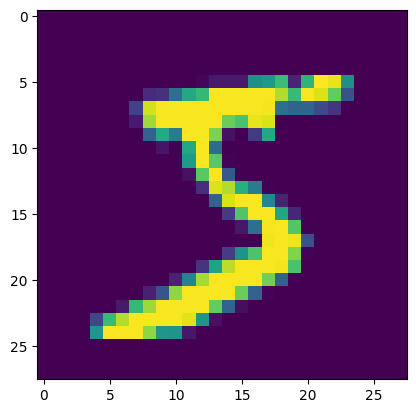

In [10]:
plt.imshow(X_train[0])

Convert pixel value into 0 and 1

In [11]:
X_train = X_train/255
X_test = X_test/255 

In [12]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [13]:
model = Sequential()

#Flatten is used to convert high dimensional arrays into 1d
model.add(Flatten(input_shape = (28,28)))  #convert into 786 #input layer 
model.add(Dense(128 , activation='relu')) #inp to hidden layer
model.add(Dense(10 , activation='softmax')) #hidden to output layer


c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Compile

In [15]:
model.compile(loss='sparse_categorical_crossentropy' , optimizer='Adam')

Train

In [23]:
history = model.fit(X_train , y_train , epochs=10 , validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - loss: 0.0135 - val_loss: 0.1080
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - loss: 0.0123 - val_loss: 0.0988
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - loss: 0.0106 - val_loss: 0.1004
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - loss: 0.0083 - val_loss: 0.1364
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - loss: 0.0088 - val_loss: 0.1200
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - loss: 0.0080 - val_loss: 0.1129
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.0061 - val_loss: 0.1516
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.0053 - val_loss: 0.1121
Epoch 9/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.0070 - val_loss: 0.1174
Epoch 10/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - loss: 0.0041 - val_loss: 0.1389


In [24]:
y_prob = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [25]:
y_prob

array([[1.42015306e-13, 1.34430282e-12, 1.04723308e-09, ...,
        9.99998331e-01, 2.42204781e-11, 3.22650379e-10],
       [8.11459714e-18, 6.38817992e-13, 1.00000000e+00, ...,
        3.17982342e-31, 1.19683614e-12, 3.99532351e-22],
       [4.22006492e-11, 9.99964118e-01, 9.88500688e-07, ...,
        2.61541936e-05, 8.57371288e-06, 3.79953633e-08],
       ...,
       [3.93411121e-25, 3.03925140e-21, 7.77780148e-22, ...,
        5.50139448e-12, 1.87206038e-14, 3.13376020e-10],
       [2.70860744e-20, 7.61721376e-23, 5.50161456e-27, ...,
        1.59263714e-19, 1.06520848e-09, 9.01473589e-22],
       [2.78041193e-21, 3.76119235e-26, 6.95793891e-17, ...,
        5.95558899e-27, 1.03747475e-14, 2.93747325e-21]],
      shape=(10000, 10), dtype=float32)

In [26]:
y_pred = y_prob.argmax(axis=1)

In [27]:
y_pred

array([7, 2, 1, ..., 4, 5, 6], shape=(10000,))

In [28]:
accuracy_score(y_test , y_pred)

0.9755

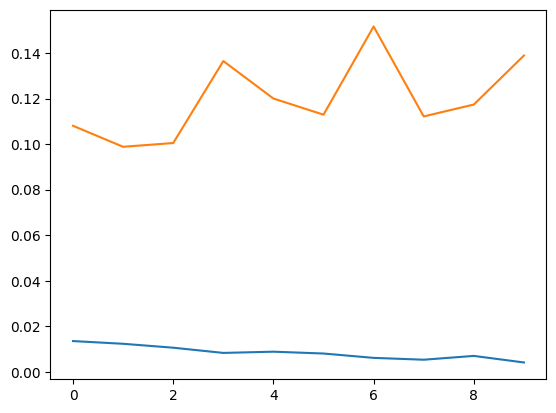

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

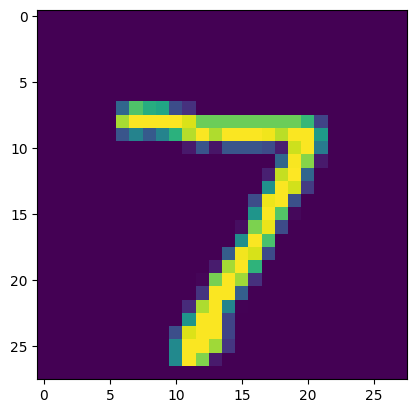

In [34]:
plt.imshow(X_test[0])

In [37]:
model.predict(X_test[0].reshape(1,28,28)).argmax(axis = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


array([7])